<a href="https://colab.research.google.com/github/Vardhan77/DeepLearningWithEVA/blob/master/Project4/s04e02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Second Change in the Network. 
Adding DropOut**

Experimented adding dropout at all position's between the convolution and max pooling.

Addding dropout of 0.1 just after the 1st conv layer after the 1st max pool.

Since , the 
back propagation has learnt the required edges and gradients before the first max pool.
Then the network might be having additional pixels that can be dropped just after the max pool.

We observe the Validation accuracy clinches 99.42% in the 18th epoch.
The network is working like a charm.

Also total number of parameters is 14.7k 

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras 

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist #The Avengers Assemble

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #Loadin the data from mnist folder into a dataframe of training and test images.

(60000, 28, 28)


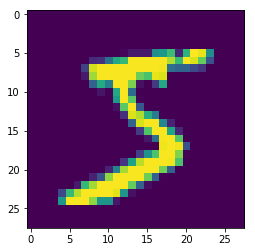

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:


Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(18, 3, 3, activation='relu', input_shape=(28,28,1))) #26
# model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
# model.add(Dropout(0.1))

model.add(Convolution2D(18, 3, 3, activation='relu')) #22
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))#11
# model.add(BatchNormalization())

model.add(Convolution2D(14, 3, 3, activation='relu')) #9
# model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) #7
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) #5
# model.add(BatchNormalization())

model.add(Convolution2D(10, 1, 1)) #5



#model.add(Convolution2D(10, 1))

model.add(Convolution2D(10, 5)) 

#model.add(Convolution2D(10, 3))

model.add(Flatten())
model.add(Activation('softmax'))


W0623 09:54:28.286534 140389288175488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
W0623 09:54:28.303509 140389288175488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0623 09:54:28.306674 140389288175488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 18)        180       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2608      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 18)        2610      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 18)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 14)          2282      
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 9, 14)          0         
__________

In [12]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

W0623 09:54:29.420982 140389288175488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0623 09:54:29.645812 140389288175488 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 7s 120us/step - loss: 0.2141 - acc: 0.9310 - val_loss: 0.0726 - val_acc: 0.9754
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 5s 76us/step - loss: 0.0642 - acc: 0.9804 - val_loss: 0.0516 - val_acc: 0.9833
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 4s 74us/step - loss: 0.0467 - acc: 0.9856 - val_loss: 0.0562 - val_acc: 0.9828
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 4s 74us/step - loss: 0.0388 - acc: 0.9881 - val_loss: 0.0393 - val_acc: 0.9866
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [=========

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [14]:
print(score)

[0.03255826018379285, 0.9914]


In [0]:
y_pred = model.predict(X_test)

In [16]:
print(y_pred[:9])
print(y_test[:9])

[[2.0056151e-20 7.8276551e-15 1.8817475e-10 3.8182704e-12 2.9785087e-23
  3.6091367e-18 1.1595020e-31 1.0000000e+00 1.6740929e-20 2.8448891e-16]
 [7.5151156e-11 8.0723817e-13 1.0000000e+00 3.1110334e-14 8.9709207e-16
  6.3806438e-20 1.4913911e-12 4.2718434e-15 6.0953148e-14 1.8768803e-17]
 [2.5107115e-12 1.0000000e+00 2.7007986e-11 1.3419980e-10 2.0215918e-09
  3.3026721e-09 1.4171247e-13 3.3388237e-10 5.5313909e-12 7.7289309e-13]
 [1.0000000e+00 3.3778815e-19 1.7435288e-13 2.7035726e-14 2.7883017e-11
  6.2415183e-13 1.0467860e-08 1.0375904e-12 6.6885807e-12 9.9576195e-11]
 [1.5084700e-20 1.1919507e-21 1.6515577e-18 2.1641987e-20 1.0000000e+00
  6.3169514e-19 6.7919141e-16 5.4035722e-17 6.4966442e-20 1.1853786e-09]
 [3.2689496e-12 9.9999988e-01 5.2666910e-10 1.0667444e-11 1.3039295e-08
  1.8787347e-10 5.7648688e-13 6.4280890e-08 2.6131403e-10 3.6731540e-10]
 [1.0002546e-17 3.9456403e-09 7.5461433e-14 2.1805347e-14 1.0000000e+00
  7.1182218e-15 1.8778112e-17 8.2903168e-10 5.3988472e-12 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

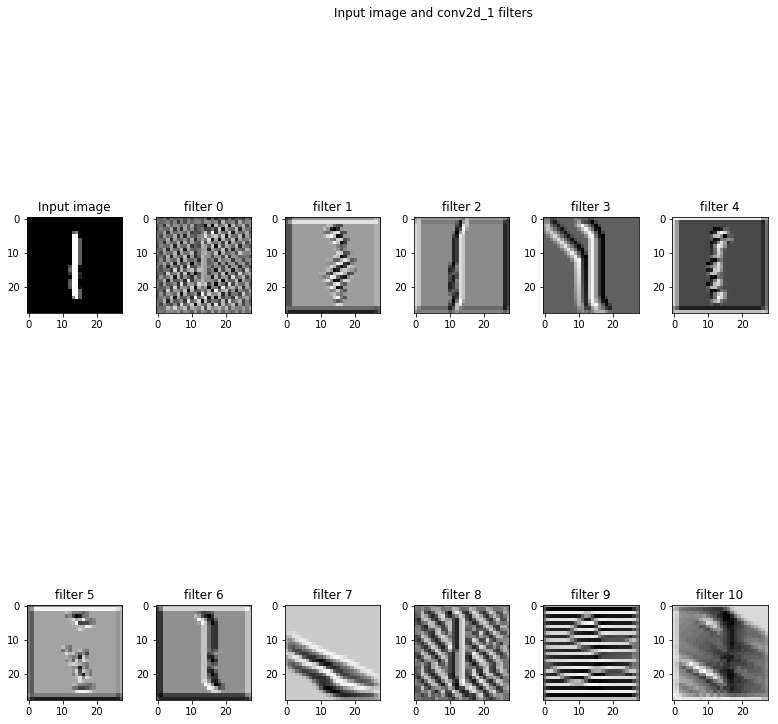

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[102]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()